In [1]:
import imgviz

In [2]:
# 라이브러리를 임포트합니다.
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from glob import glob
import directory_tree
import PIL.Image as Image
import imgviz
import seaborn as sns
import cv2
import plotly.io as pio # Plotly input output
import plotly.express as px # 빠르게 그리는 방법
import plotly.graph_objects as go # 디테일한 설정

pio.templates.default = 'plotly_white' # 템플릿을 지정합니다.

warnings.filterwarnings(action='ignore')

In [3]:
def image_mask_overlap_grid(image_list, mask_list):
    # 이미지를 그리드 형태로 보여주는 함수입니다.
    class_names = ['normal', 'crack']
    fig = plt.figure(figsize=(20, 20))
    for i in range(9):
        img = np.array(Image.open(image_list[i]).convert('L'))
        mask = np.array(Image.open(mask_list[i]).convert('L'))
        overlapped_image = imgviz.label2rgb(mask, image=img, label_names=class_names, font_size=25)
        plt.subplot(3, 3, i+1)
        plt.imshow(overlapped_image)
        plt.title(image_list[i].split('/')[-1])
        plt.axis('off')

In [4]:
data_directory = '/scratch/network/mk8574/crack_detection_challenge/data'

In [5]:
train_image_directory = os.path.join(data_directory, 'train', 'images')
train_mask_directory = os.path.join(data_directory, 'train', 'masks')

# 평가용 데이터 디렉토리
test_image_directory = os.path.join(data_directory, 'test', 'images')

# 데이터 파일 경로를 리스트로 저장합니다.
train_image_paths = sorted(glob(os.path.join(train_image_directory, '*.jpg')))
train_mask_paths = sorted(glob(os.path.join(train_mask_directory, '*.png')))
test_image_paths = sorted(glob(os.path.join(test_image_directory, '*.jpg')))

# 각 데이터의 수량을 확인합니다.
print(f'학습용 이미지 : {len(train_image_paths)}개, 학습용 마스크 : {len(train_mask_paths)}개, 평가용 이미지 : {len(test_image_paths)}개')

학습용 이미지 : 5986개, 학습용 마스크 : 5986개, 평가용 이미지 : 3992개


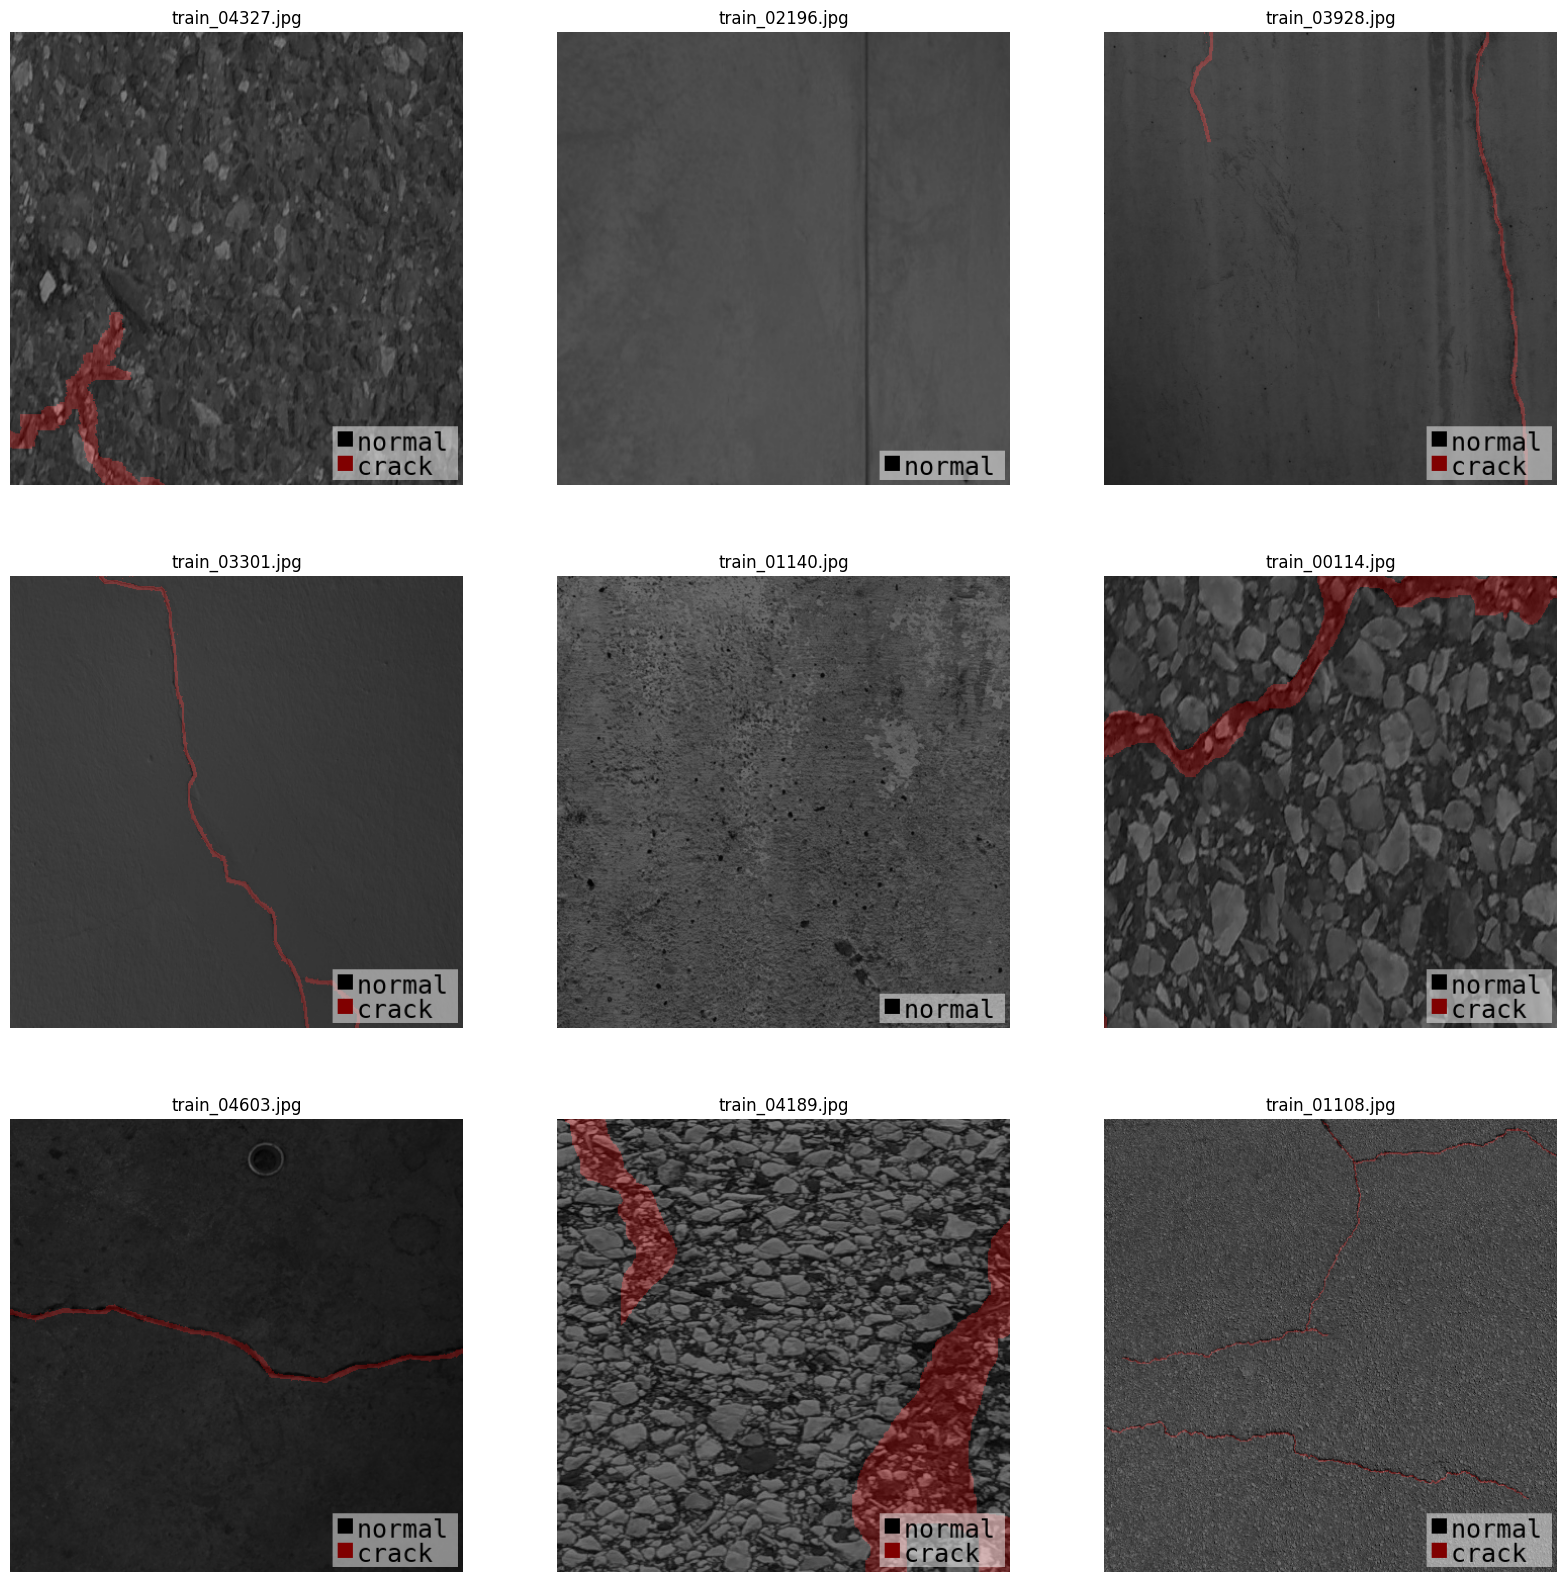

In [6]:
selected_image = np.random.choice(train_image_paths, 9)
selected_mask = [i.replace('images', 'masks').replace('jpg', 'png') for i in selected_image]
image_mask_overlap_grid(selected_image, selected_mask)